In [1]:
import sys
import asyncio
import logging
import numpy as np
import matplotlib.pyplot as plt
from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign
import time
from lsst.ts import salobj

In [2]:
# Temporarily needed to run at summit
import os
os.environ["LSST_DDS_DOMAIN"] = 'lsatmcs'
os.environ["OSPL_URI"] = "file:///home/patrickingraham/ospl.xml"

In [3]:
stream_handler = logging.StreamHandler(sys.stdout)
# if you want logging
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [4]:
script = LatissCWFSAlign(index=1, remotes=False)
script.dataPath='/project/shared/auxTel/'

In [5]:

# script.angle = 0.
# script.intra_visit_id = 2020012800333
# script.extra_visit_id = 2020012800334

Read historical data in 0.01 sec
Read historical data in 0.28 sec
Read historical data in 0.68 sec
Read historical data in 1.55 sec
Read historical data in 2.44 sec
Read historical data in 2.81 sec
Read historical data in 3.69 sec
Read historical data in 4.31 sec
Read historical data in 5.63 sec
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
Read historical data in 7.29 sec
Read historical data in 8.69 sec
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 41 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 12 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 11 messages


In [6]:
#await script.attcs.stop_tracking()

RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 19 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 44 messages


In [38]:
script.filter='BG40'
script.grating = 'empty_1'
script.exposure_time = 15

In [45]:
# command to offset hexapod
#offset = {'x':0, 'y':  0.0, 'z': -0.03035911}
#await script.attcs.ataos.cmd_offset.set_start(**offset)

In [46]:
#await script.attcs.offset_xy(y=0,x=60) # not cumulative (sticky) offsets!

In [29]:
#await script.latiss.take_engtest(exptime=2,n=1)

Generating group_id
ENGTEST 0001 - 0001


array([2020031200279])

In [30]:
#apply hexapod focus offset
#await script.hexapod_offset(-0.02458927)
#await script.attcs.ataos.cmd_resetOffset.start()

In [31]:
script.binning = 1

Using binning factor of 1


In [6]:
# # To test a single pair of images just put image id's. Set to None to get new images 
script.intra_visit_id = 2020031200289
script.extra_visit_id = 2020031200290
script.angle = 61.7-37.9 # elev - nas2 


start_time=time.time()
await script.run_cwfs()
end_time=time.time()
print('WFE fitting took {0:0.3f} seconds'.format(end_time-start_time)) # 56.7s

Running cwfs in 2020031200289/2020031200290.


/home/patrickingraham/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000289.yaml
AT_O_20200312_000289: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000289: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000289.yaml
AT_O_20200312_000289: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000289: Dark time less than exposure time. Setting dark time to the exposure time.


/home/patrickingraham/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f50a88265f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139983272969984 and this is thread id 139977834620672.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f50a88265f0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000290.yaml
AT_O_20200312_000290: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000290: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000290.yaml
AT_O_20200312_000290: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000290: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
intra_square shape is (102, 102)
extra_square shape is (102, 102)
Running CWFS code USING BINNED IMAGES.
Measured zernike coeficients: [2.41689359110156, 16.60160148018244, 27.788537825192186]
De-rotated zernike coeficients: [ 8.91085835 14.21446974 27.78853783]
Hexapod offset: [ 0.06802182 -0.1085074  -0.00661632]
Telescope offsets: [ 4.08130917 -6.51044415  0.        ]

WFE fitting took 35.995 seconds


In [7]:
#await script.latiss.take_engtest(exptime=2,n=1)

In [8]:
# await script.attcs.ataos.cmd_applyAxisOffset.set_start(axis='y', offset=-0.2)
# offset = {'x':-0.5 , 'y':0., 'z': 0.}
# await script.attcs.ataos.cmd_offset.set_start(**offset)

In [9]:
#await script.attcs.slew_object('HD 107696', pa_ang=70)

Measured zernike coeficients: [2.41689359110156, 16.60160148018244, 27.788537825192186]
De-rotated zernike coeficients: [ 8.91085835 14.21446974 27.78853783]
Hexapod offset: [ 0.06802182 -0.1085074  -0.00661632]
Telescope offsets: [ 4.08130917 -6.51044415  0.        ]

[ 27.78853783 112.01324923  83.66162279   2.41689359  16.60160148
  -3.29978288  -4.38651283  46.7270983    1.01654418]
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>

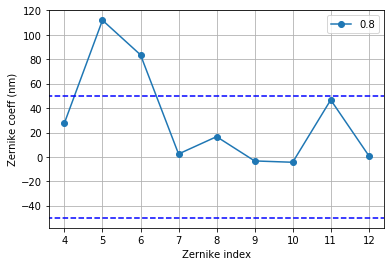

In [10]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10

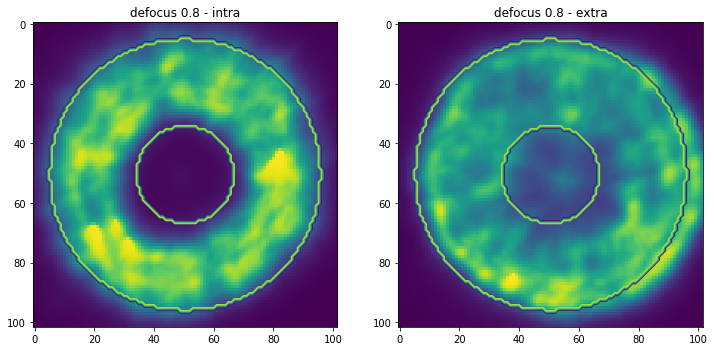

In [11]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 

## Take an in-focus image?

In [ ]:
if True:
    # Start a logger to publish observer notes to the EFD
    # find it using SELECT "message" FROM "efd"."autogen"."lsst.sal.Script.logevent_logMessage" WHERE time > :dashboardTime:
    comment_log_controller = salobj.Controller("Script", index=1)
    comment_log_controller.evt_logMessage.set_put(message="Starting In-focus post CWFS data on current target")
    #comment_log_controller.evt_logMessage.set_put(message="Test: {}".format(time.time()))
    tmp = latiss.take_object(exptime=15, n=1)
    comment_log_controller.evt_logMessage.set_put(message="Finished In-focus post CWFS data current target"))

In [ ]:
tmp = await script.attcs.atptg.evt_currentTarget.next(flush=True, timeout=15)
print(tmp)

In [ ]:
tmp = await script.attcs.atptg.evt_heartbeat.next(flush=True, timeout=15)

In [ ]:
print(tmp)

NameError: name 'butler' is not defined

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 15 messages


In [54]:
from lsst.daf.persistence import Butler
repo='/project/shared/auxTel'
butler = Butler(repo)
dataId = dict(dayObs="2020-03-12", seqNum='289')

RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages


In [58]:
md=butler.get('raw_md', dataId=dataId)

In [67]:
print(md['AZSTART'])
print(md['ELSTART'])
print(md['ROTPA'])

190.573727865471
61.7582071407669
116.532338952854
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
